In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [2]:
warnings.filterwarnings(action="ignore",
                        message="^internal gelsd")
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})
pd.set_option("display.max_rows",
              None, 
              "display.max_columns",
              None)

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [3]:
def axes_log_conversion (list_of_values):
    list_num = []
    for i in list_of_values:
        list_num.append(str(int(round(((-10**(-i) + 1) * 100),0))) + '%')
    return list_num

In [4]:
df = pd.read_csv('../data/question-answering-on-squad-1-1.csv',
                 usecols=['name',
                          'year',
                          'hardware_burden',
                          '(EM score)'])[3:].reset_index(drop=True)

In [5]:
df = df.astype({'hardware_burden': 'float64',
                '(EM score)': 'float64'})

df['em_percent'] = df['(EM score)'].astype(float)/100

df = df[['name', 
         'year',
         'em_percent',
         'hardware_burden']]

In [6]:
df.head(10)

,name,year,em_percent,hardware_burden
0,ANNA large (single model),2021,0.9060,9.290000e+22
1,LUKE,2020,0.9020,5.970000e+20
2,XLNet (single model),2020,0.8990,2.550000e+22
3,XLNET-123 (single model),2019,0.8960,NaN
4,SpanBERT (single model),2020,0.8880,5.860000e+20
5,BERT (single model),2019,0.8510,2.320000e+21
6,MAMCN+ (single model),2018,0.7969,NaN
7,Reinforced Mnemonic Reader (single model),2018,0.7950,NaN
8,BiDAF + Self Attention + ELMo (single model),2018,0.7860,NaN
9,{gqa} (single model),2019,0.7710,NaN


## Hardware Burden

In [7]:
acc__hw_burden__poly = ols('I((np.log10(1/(1-em_percent)))) ~ I(np.log10(hardware_burden))',data=df).fit()
print(acc__hw_burden__poly.summary()) 

                                     OLS Regression Results                                    
Dep. Variable:     I((np.log10(1 / (1 - em_percent))))   R-squared:                       0.872
Model:                                             OLS   Adj. R-squared:                  0.859
Method:                                  Least Squares   F-statistic:                     68.02
Date:                                 Thu, 04 Aug 2022   Prob (F-statistic):           9.01e-06
Time:                                         12:17:38   Log-Likelihood:                 14.314
No. Observations:                                   12   AIC:                            -24.63
Df Residuals:                                       10   BIC:                            -23.66
Df Model:                                            1                                         
Covariance Type:                             nonrobust                                         
                                   coef 

/opt/homebrew/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


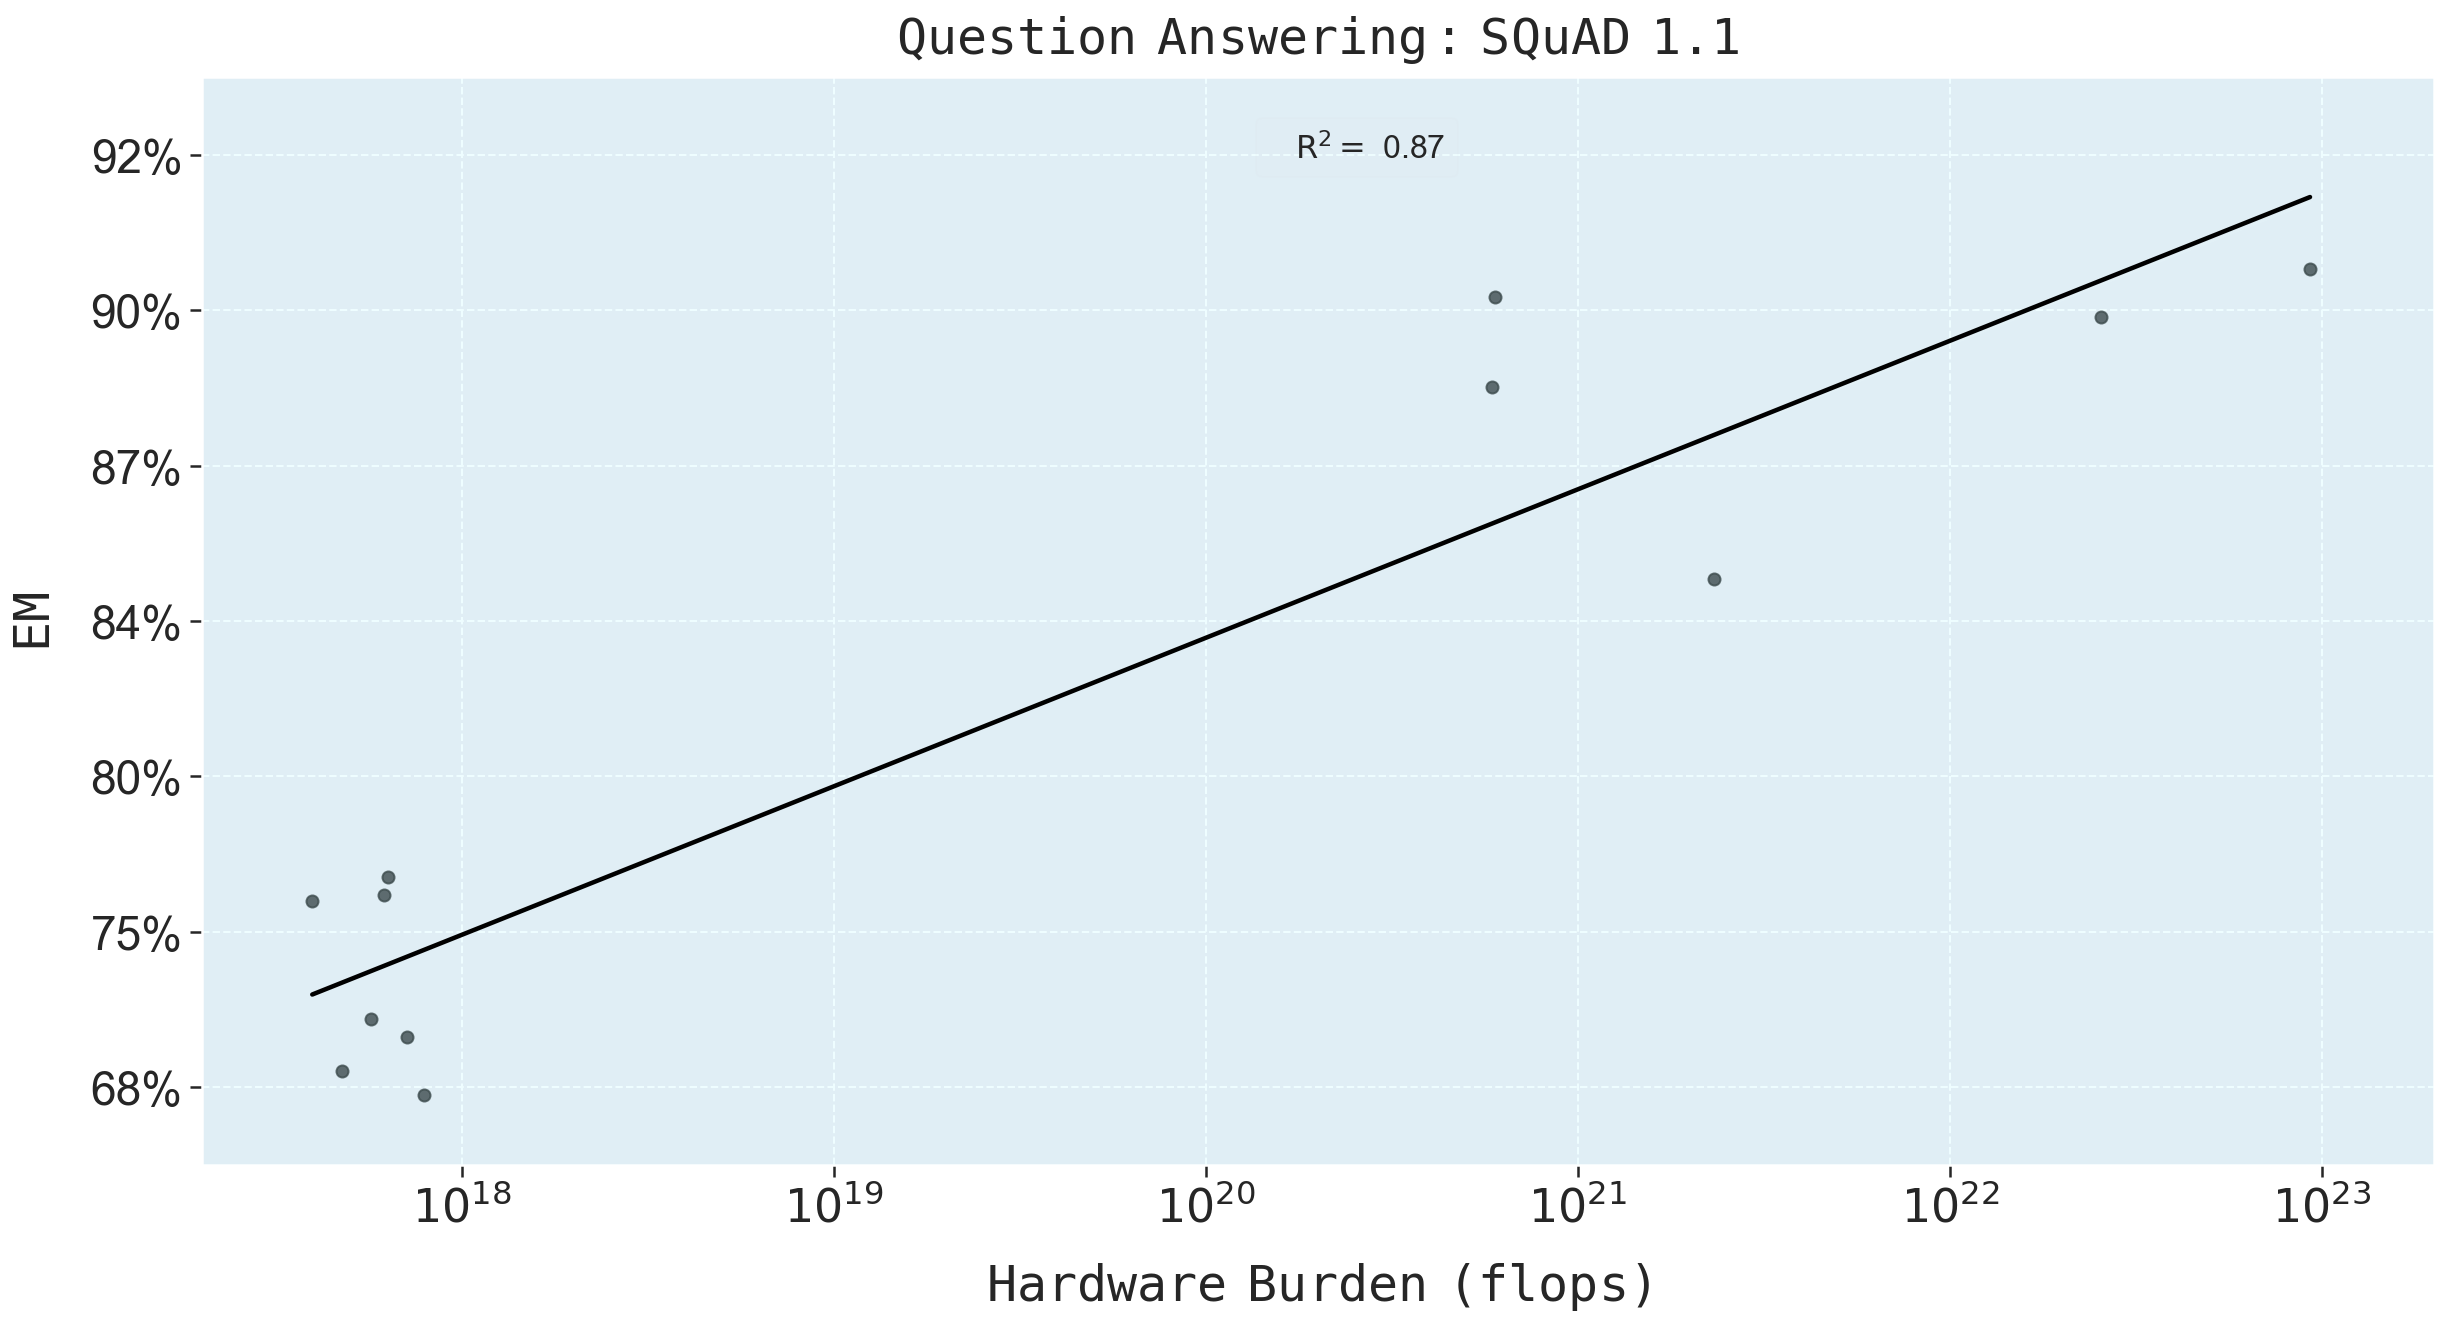

In [11]:
fig = plt.figure(figsize=(20, 10))

sns.regplot(x=np.log10(df['hardware_burden']),
            y=np.log10(1/(1-df['em_percent'])),
            color='black',
            ci = False,
            label=r'$\mathrm{R^{2}}=\ $' +
            str(round(acc__hw_burden__poly.rsquared,2)))

plt.title('$\mathtt{Question\ \ Answering:\ SQuAD\ \ 1.1}$',
          fontsize=25,
          weight='bold',
          pad=12)

plt.ylabel("$\mathtt{EM}$",
           fontsize=25,
           labelpad=15,
           weight='bold')

plt.xlabel("$\mathtt{Hardware\ \ Burden\ \ (flops)}$",
           fontsize=25,
           labelpad=15,
           rotation=0,
           y=.975,
           weight='bold')

plt.legend(bbox_to_anchor=(.57,.977),
           handlelength=0,
           framealpha =.03,
           fontsize=16,
           markerscale=0)

plt.axhspan(.45, 1.15, color="#c9f9ff", alpha=0.3)

x = np.arange(18,24,1)

y = np.arange(.5, 1.15, .1)

x_label = ['$10^{18}$', '$10^{19}$', '$10^{20}$',
           '$10^{21}$', '$10^{22}$', '$10^{23}$']

y_label = axes_log_conversion(y)

plt.xlim(17.3, 23.3)

plt.ylim(.45, 1.15)

plt.yticks(y, y_label, size=23)

plt.xticks(x, x_label, size=23)

plt.show()

In [9]:
acc__hw_burden__exp = ols('I((1/(1-em_percent))) ~ I(np.log10(hardware_burden))',data=df).fit()
print(acc__hw_burden__exp.summary()) 

                                OLS Regression Results                               
Dep. Variable:     I((1 / (1 - em_percent)))   R-squared:                       0.878
Model:                                   OLS   Adj. R-squared:                  0.866
Method:                        Least Squares   F-statistic:                     71.82
Date:                       Thu, 04 Aug 2022   Prob (F-statistic):           7.08e-06
Time:                               12:17:39   Log-Likelihood:                -17.244
No. Observations:                         12   AIC:                             38.49
Df Residuals:                             10   BIC:                             39.46
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

/opt/homebrew/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
